In [1]:
# Setting package umum 
import pandas as pd
import pandas_profiling as pp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
import time
import tensorflow as tf
%matplotlib inline

from matplotlib.pylab import rcParams
# For every plotting cell use this
# grid = gridspec.GridSpec(n_row,n_col)
# ax = plt.subplot(grid[i])
# fig, axes = plt.subplots()
rcParams['figure.figsize'] = [10,5]
plt.style.use('fivethirtyeight') 
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.options.display.float_format = '{:.5f}'.format

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sign-language-mnist/american_sign_language.PNG
/kaggle/input/sign-language-mnist/amer_sign2.png
/kaggle/input/sign-language-mnist/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/amer_sign3.png
/kaggle/input/sign-language-mnist/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv
/kaggle/input/dogs-vs-cats/sampleSubmission.csv
/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip


In [ ]:
### Try Keras
from keras import Sequential
from keras.layers import Dense

# Define model
model = Sequential([Dense(units=1, input_shape=[1])])

# Compile model
model.compile(optimizer='sgd', loss='mean_squared_error')

# Define data
xs = np.array([-1, 0, 1, 2, 3, 4], dtype=float)
ys = np.array([-3, -1, 1, 3, 5, 7], dtype=float)

# Train model
model.fit(xs, ys, epochs=500)

In [ ]:
### Predict
model.predict([6])

# Exercise 1 : House Pirce Question

In [ ]:
### House price
from keras import Sequential
from keras.layers import Dense

# Define model
model = Sequential()
model.add(Dense(units=1, input_shape=[1]))

# Compile model
model.compile(optimizer='sgd', loss='mean_squared_error')

# Define data
xs = np.array([0,1,2,3,4,5,6], dtype=float)
ys = np.array([0.5,1,1.5,2,2.5,3,3.5], dtype=float)

# Train model
model.fit(xs, ys, epochs=500)

# Predict
model.predict([7])

# Fashion MNIST

In [ ]:
### Load data
from keras.datasets import fashion_mnist
(train_img, train_lab), (test_img, test_lab) = fashion_mnist.load_data()

In [ ]:
### Plot one image
plt.imshow(train_img[11]) ;

In [ ]:
### Normalize data
train_img = train_img / 225
test_img = test_img / 225

In [ ]:
### Make keras model
import tensorflow as tf
from keras import Sequential
from keras.layers import Flatten,Dense
import time

start = time.time()

# Set early stopping
class EarlyStop(tf.keras.callbacks.Callback) :
    
    def __init__(self, threshold) :
        self.thres = threshold
        
    def on_epoch_end(self, epoch, logs={}) :
        if (logs.get('accuracy')>self.thres) :
            print('\nReached',self.thres*100,'Accuracy so stop train!')
            self.model.stop_training=True
            
callbacks = EarlyStop(0.9)

# Define model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512, activation=tf.nn.relu))
model.add(Dense(512, activation=tf.nn.relu))
model.add(Dense(10, activation=tf.nn.softmax))

# Compile model
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(train_img, train_lab, epochs=10, callbacks=[callbacks])

end = time.time()
print('Time Used :',(end-start)/60)

In [ ]:
### Evaluate model
model.evaluate(test_img, test_lab)

In [ ]:
### Predict 
pred = model.predict(test_img)

In [ ]:
### See the predicted label
np.argmax(pred[0])

# Digit MNIST

In [ ]:
### Load data
from keras.datasets import mnist
(train_img, train_lab), (test_img, test_lab) = mnist.load_data()

In [ ]:
### Normalize data
train_img = train_img / 225
test_img = test_img / 225

In [ ]:
### See the shape of the data
print(train_img.shape)
print(len(set(train_lab)))

In [ ]:
### Make keras model
import tensorflow as tf
from keras import Sequential
from keras.layers import Flatten,Dense
import time

start = time.time()

# Set early stopping
class EarlyStop(tf.keras.callbacks.Callback) :
    
    def __init__(self, threshold) :
        self.thres = threshold
        
    def on_epoch_end(self, epoch, logs={}) :
        if (logs.get('accuracy')>self.thres) :
            print('\nReached',self.thres*100,'Accuracy so stop train!')
            self.model.stop_training=True
            
callbacks = EarlyStop(0.99)

# Define model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512, activation=tf.nn.relu))
model.add(Dense(512, activation=tf.nn.relu))
model.add(Dense(10, activation=tf.nn.softmax))

# Compile model
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(train_img, train_lab, epochs=10, callbacks=[callbacks])

end = time.time()
print('Time Used :',(end-start)/60)

# Cat vs Dog

In [ ]:
### Download the data
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

In [ ]:
### Unzip the data
import zipfile
import time

start = time.time()

data_zip = '/tmp/cats_and_dogs_filtered.zip'
data_ref = zipfile.ZipFile(data_zip, 'r')
data_ref.extractall()
data_ref.close()
print('Unzip Data Completed')

end = time.time()
print('Time Used :',(end-start)/60)

In [ ]:
### Set directory path for data train and validation
import os
base_dir = '/kaggle/working/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
val_cats_dir = os.path.join(val_dir, 'cats')
val_dogs_dir = os.path.join(val_dir, 'dogs')

In [ ]:
### Get the name of the file for train and validation
train_cat_fn = os.listdir(train_cats_dir)
train_dog_fn = os.listdir(train_dogs_dir)

val_cat_fn = os.listdir(val_cats_dir)
val_dog_fn = os.listdir(val_dogs_dir)

In [ ]:
### Image example
import matplotlib.image as mpimg
rcParams['figure.figsize'] = [10,5]
plt.style.use('fivethirtyeight') 
sns.set_style('whitegrid')
grid = gridspec.GridSpec(1,2)

# Cat image
ax = plt.subplot(grid[0])
cat_img = mpimg.imread(os.path.join(train_cats_dir, train_cat_fn[0]))
ax.imshow(cat_img)
ax.axis('off') ;

# Dog image
ax = plt.subplot(grid[1])
dog_img = mpimg.imread(os.path.join(train_dogs_dir, train_dog_fn[0]))
ax.imshow(dog_img)
ax.axis('off') ;

Image size varied

In [ ]:
### Preprocess the image
from keras.preprocessing.image import ImageDataGenerator

# Define generator
train_datagen = ImageDataGenerator(rescale=1/255)
val_datagen = ImageDataGenerator(rescale=1/255)

# Define flow for train gen
train_gen = train_datagen.flow_from_directory(train_dir,
                                              batch_size=20,
                                              class_mode='binary',
                                              target_size=(150,150))

# Define flow for validation gen
val_gen = val_datagen.flow_from_directory(val_dir,
                                          batch_size=20,
                                          class_mode='binary',
                                          target_size=(150,150))

In [ ]:
### Make keras model
import tensorflow as tf
import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import time

start = time.time()

# Set early stopping
class EarlyStop(tf.keras.callbacks.Callback) :
    
    def __init__(self, threshold) :
        self.thres = threshold
        
    def on_epoch_end(self, epoch, logs={}) :
        if (logs.get('val_accuracy')>self.thres) :
            print('\nReached',self.thres*100,' Validation Accuracy so stop train!')
            self.model.stop_training=True
            
callbacks = EarlyStop(0.72)

# Define model
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit_generator(train_gen, 
                              validation_data=val_gen,
                              steps_per_epoch=100,
                              epochs=20,
                              validation_steps=50,
                              verbose=1,
                              callbacks=[callbacks])

end = time.time()
print('Time Used :',(end-start)/60)

In [ ]:
### Try predict some image
from keras.preprocessing.image import load_img, img_to_array
from random import sample
list_cat_fn = [os.path.join(val_cats_dir, fn) for fn in sample(val_cat_fn, 5)]
list_dog_fn = [os.path.join(val_dogs_dir, fn) for fn in sample(val_dog_fn, 5)]
list_fn = list_cat_fn + list_dog_fn

# Iteration to predict
for fn in list_fn :
    
    # Load and preprocess image
    img = load_img(fn, target_size=(150,150))
    vect_img = img_to_array(img)
    vect_img = np.expand_dims(vect_img, axis=0)
    ready_img = np.vstack([vect_img])
    
    # Predict
    classes = model.predict(ready_img, batch_size=10)
    if classes == 0 :
        print(fn,'is a cat')
    else :
        print(fn,'is a dog')

In [ ]:
### Representation of the image based on model
from keras.preprocessing.image import load_img, img_to_array
import keras
from random import choice
list_cat_fn = [os.path.join(val_cats_dir, fn) for fn in sample(val_cat_fn, 5)]
list_dog_fn = [os.path.join(val_dogs_dir, fn) for fn in sample(val_dog_fn, 5)]
list_fn = list_cat_fn + list_dog_fn
succ_out = [layer.output for layer in model.layers[1:]]

# Define viz model
viz_model = keras.models.Model(inputs=model.input, outputs=succ_out)

# Pick one image randomly
img = load_img(choice(list_fn), target_size=(150,150))
x = img_to_array(img)
x   = x.reshape((1,) + x.shape)  
x = x / 255

# Predicting
successive_feature_maps = viz_model.predict(x)

# List of layer name
layer_names = [layer.name for layer in model.layers]

# Plot the visualization on each layer
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

In [ ]:
### Plot the performance of the model
rcParams['figure.figsize'] = [10,8]
plt.style.use('fivethirtyeight') 
sns.set_style('whitegrid')
grid = gridspec.GridSpec(2,1)

# Set the variable 
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]
epo      = list(range(len(acc)))

# Plot the loss
ax = plt.subplot(grid[0])
ax.plot(epo, loss, label='Train Loss')
ax.plot(epo, val_loss, label='Validation Loss')
ax.set_title('Training and Validation Loss')
ax.legend() ;

# Plot the loss
ax = plt.subplot(grid[1])
ax.plot(epo, acc, label='Train Acc')
ax.plot(epo, val_acc, label='Validation Acc')
ax.set_title('Training and Validation Accuracy')
ax.legend() ;

plt.tight_layout()

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [ ]:
### Load full data
import zipfile
import time

# Unzip train data
start = time.time()

train_zip = '/kaggle/input/dogs-vs-cats/train.zip'
train_ref = zipfile.ZipFile(train_zip, 'r')
train_ref.extractall()
train_ref.close()
print('Unzip Train Completed')

end = time.time()
print('Time Used :',(end-start)/60)

# Unzip test data
start = time.time()

test_zip = '/kaggle/input/dogs-vs-cats/test1.zip'
test_ref = zipfile.ZipFile(test_zip, 'r')
test_ref.extractall()
test_ref.close()
print('Unzip Test Completed')

end = time.time()
print('Time Used :',(end-start)/60)

In [ ]:
### Make directory for ImageGenerator
import os
TRAINING_DIR = '/kaggle/training/'
TRAINING_CAT_DIR = '/kaggle/training/cat/'
TRAINING_DOG_DIR = '/kaggle/training/dog/'
os.mkdir(TRAINING_DIR)
os.mkdir(TRAINING_CAT_DIR)
os.mkdir(TRAINING_DOG_DIR)

VALIDATION_DIR = '/kaggle/validation/'
VALIDATION_CAT_DIR = '/kaggle/validation/cat/'
VALIDATION_DOG_DIR = '/kaggle/validation/dog/'
os.mkdir(VALIDATION_DIR)
os.mkdir(VALIDATION_CAT_DIR)
os.mkdir(VALIDATION_DOG_DIR)

In [ ]:
### List file name in train dataset
SOURCE_DIR = '/kaggle/working/train/'
list_fn = os.listdir(SOURCE_DIR)
list_cat_fn = [fn for fn in list_fn if 'cat' in fn]
list_dog_fn = [fn for fn in list_fn if 'dog' in fn]

In [ ]:
### Split data
import random
from shutil import copyfile
SPLIT_PROP = 0.8
list_class = ['cat','dog']
list_name_fn = [list_cat_fn, list_dog_fn]

for i,c in enumerate(tqdm(list_class)) :
            
    # Splitting
    list_class_fn = list_name_fn[i]
    pure_random = random.sample(list_class_fn, len(list_class_fn))
    random_train = pure_random[:int(SPLIT_PROP*len(pure_random))]
    random_val = pure_random[int(SPLIT_PROP*len(pure_random)):]
    
    # Insert into new train dir
    TRAIN_CLASS_DIR = os.path.join(TRAINING_DIR,c)
    for f in random_train :
        copyfile(os.path.join(SOURCE_DIR,f), os.path.join(TRAIN_CLASS_DIR,f))
        
    # Insert into new valid dir
    VALID_CLASS_DIR = os.path.join(VALIDATION_DIR,c)
    for f in random_val :
        copyfile(os.path.join(SOURCE_DIR,f), os.path.join(VALID_CLASS_DIR,f))
        
    del pure_random, random_train, random_val

In [ ]:
# Make pre train model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions

HEIGHT = 150
WIDTH = 150
base_model = ResNet50(weights='imagenet', 
                 include_top=False, 
                 input_shape=(HEIGHT, WIDTH, 3))

prec_input = tf.keras.applications.resnet50.preprocess_input
decode = tf.keras.applications.resnet50.decode_predictions

In [ ]:
### Define parameter
BATCH_SIZE=10
EPOCHS = 10

In [ ]:
### Preprocess the image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define generator
train_datagen = ImageDataGenerator(rescale=1/255, preprocessing_function=prec_input)
val_datagen = ImageDataGenerator(rescale=1/255, preprocessing_function=prec_input)

# Define flow for train gen
train_gen = train_datagen.flow_from_directory(TRAINING_DIR,
                                              batch_size=BATCH_SIZE,
                                              interpolation='bicubic',
                                              class_mode='categorical',
                                              shuffle=True,
                                              target_size=(HEIGHT, WIDTH))

# Define flow for validation gen
val_gen = val_datagen.flow_from_directory(VALIDATION_DIR,
                                          batch_size=BATCH_SIZE,
                                          interpolation='bicubic',
                                          class_mode='categorical',
                                          shuffle=False,
                                          target_size=(HEIGHT, WIDTH))

In [ ]:
### Add layer and dont train the layer before
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras import Sequential, Model
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.metrics import Precision
from tensorflow.keras.activations import swish
fc_layers = []
num_classes = 2
dropout = 0.2

def make_model() :
    
    # Freeze layer
    for l in base_model.layers :
        l.trainable = False

    # Make new model
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Flatten())
    for fc in fc_layers:

        # New FC layer, random init
        model.add(Dense(fc, activation=swish))
        model.add(Dropout(dropout))

    model.add(Dense(num_classes, activation='softmax'))

    # Compile model
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['acc'])
    
    return model


model = make_model()
model.summary()

In [ ]:
history = model.fit_generator(train_gen,
                              epochs=EPOCHS,
                              verbose=1,
                              validation_data=val_gen)


In [ ]:
# DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
# USE AT LEAST 3 CONVOLUTION LAYERS
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(2, activation='softmax')  

# YOUR CODE HERE
])

model.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit_generator(train_gen,
                              epochs=EPOCHS,
                              verbose=1,
                              validation_data=val_gen)


# Human vs Horse

In [ ]:
### Get data
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip -O /tmp/horse-or-human.zip
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip -O /tmp/validation-horse-or-human.zip 

In [ ]:
### Extract the zip file
import zipfile
import time

# Unzip train data
data_zip = '/tmp/horse-or-human.zip'
data_ref = zipfile.ZipFile(data_zip, 'r')
data_ref.extractall('/training')
data_ref.close()
print('Unzip Train Data Completed')

# Unzip valid data
valid_zip = '/tmp/validation-horse-or-human.zip'
valid_ref = zipfile.ZipFile(valid_zip, 'r')
valid_ref.extractall('/validating')
valid_ref.close()
print('Unzip Valid Data Completed')

%time

In [ ]:
### Check the proportion of classes in train and valid dataset
TRAIN_HORSE_DIR = '/training/horses'
TRAIN_HUMAN_DIR = '/training/humans'
VAL_HORSE_DIR = '/validating/horses'
VAL_HUMAN_DIR = '/validating/humans'

print('Total obs on horse class in train :',len(os.listdir(TRAIN_HORSE_DIR)))
print('Total obs on human class in train :',len(os.listdir(TRAIN_HUMAN_DIR)))
print('Total obs on horse class in validation :',len(os.listdir(VAL_HORSE_DIR)))
print('Total obs on human class in validation :',len(os.listdir(VAL_HUMAN_DIR)))

In [ ]:
### Define pretrained model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input,decode_predictions
BATCH_SIZE = 20
INPUT_SIZE = (150,150)

# Get local weight
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
    
# Define inception model
base_model = InceptionV3(weights=None, 
                         include_top=False, 
                         input_shape=(INPUT_SIZE[0], INPUT_SIZE[1], 3))

# Load local weight
local_weight_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
base_model.load_weights(local_weight_file)

# Freeze all layer
base_model.trainable = False

# Summary of the model
base_model.summary()

In [ ]:
### Get specific layer from pre-trained model 
last_layer = base_model.get_layer('mixed7')
last_output = last_layer.output

print('Last layer shape :',last_layer.output_shape)

In [ ]:
### Set the image generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
TRAIN_DIR = '/training'
VALID_DIR = '/validating'

# Make image generator for training dataset
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

train_gen = train_datagen.flow_from_directory(TRAIN_DIR,
                                              batch_size = BATCH_SIZE,
                                              class_mode = 'binary', 
                                              target_size = INPUT_SIZE)  

# Make image generator for validation dataset
val_datagen = ImageDataGenerator(rescale = 1/255. )

val_gen =  val_datagen.flow_from_directory(VALID_DIR,
                                            batch_size  = BATCH_SIZE,
                                            class_mode  = 'binary', 
                                            target_size = INPUT_SIZE)

In [ ]:
### Define new model
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras import Sequential, Model
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.metrics import Precision
from tensorflow.keras.activations import swish\

# model = Sequential()
# model.add(base_model)
# model.add(Flatten())
# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='sigmoid'))

# Use this when you not using the whole pre trained model
x = Flatten()(last_output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(base_model.input, x)

# Compile model
model.compile(optimizer = RMSprop(lr=0.0001),
              loss = 'binary_crossentropy',
              metrics = 'accuracy')


In [ ]:
### Define early callback based on metrics
class EarlyStop(tf.keras.callbacks.Callback) :
    
    def __init__(self, threshold) :
        self.thres = threshold
        
    def on_epoch_end(self, epoch, logs={}) :
        if (logs.get('accuracy')>self.thres) :
            print('\nReached',self.thres*100,'Accuracy so stop train!')
            self.model.stop_training=True
            
callbacks = EarlyStop(0.99)

In [ ]:
### Train model
EPOCHS = 99
history = model.fit_generator(train_gen,
                              validation_data=val_gen,
                              steps_per_epoch=100,
                              validation_steps=50,
                              epochs=EPOCHS,
                              callbacks=callbacks,
                              verbose=1)


# Rock Paper Scissors

In [ ]:
### Function to read the data
def get_data(path) :
    # Read the csv
    df = pd.read_csv(path)
    
    # Get all the label
    from tensorflow.keras.utils import to_categorical
    label = to_categorical(np.array(df['label']))
    
    # Get array of image
    image = []
    for i in range(len(df)) :
        split_img = np.array(np.split(df.iloc[i,1:].values, 28))
        image.append(split_img)
    
    return np.array(image), label
    

In [ ]:
### Get data
train_img, train_label = get_data('../input/sign-language-mnist/sign_mnist_train.csv')
val_img, val_label = get_data('../input/sign-language-mnist/sign_mnist_test.csv')

%time

In [ ]:
### Shape of the data
print('Train image shape :',train_img.shape)
print('Train label shape :',train_label.shape)
print('Valid image shape :',val_img.shape)
print('Valid label shape :',val_label.shape)

In [ ]:
### Make the image generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
BATCH_SIZE = 32
INPUT_SIZE = (28,28)
TRAIN_DIR = '/training'
VALID_DIR = '/validating'

# Make image generator for training dataset
train_img = np.expand_dims(train_img, 3)
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

train_gen = train_datagen.flow(x=train_img, y=train_label,
                              batch_size = BATCH_SIZE)  

# Make image generator for validation dataset
val_img = np.expand_dims(val_img, 3)
val_datagen = ImageDataGenerator(rescale = 1/255. )

val_gen = val_datagen.flow(x=val_img, y=val_label,
                              batch_size = BATCH_SIZE) 

In [ ]:
### Define new model
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, MaxPooling2D, Conv2D
from tensorflow.keras import Sequential, Model
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.metrics import Precision
from tensorflow.keras.activations import swish\

model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(INPUT_SIZE[0], INPUT_SIZE[1], 1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(25, activation='softmax'))

# Compile model
model.compile(optimizer = Adam(),
              loss = 'categorical_crossentropy',
              metrics = 'accuracy')


In [ ]:
### Define early callback based on metrics
class EarlyStop(tf.keras.callbacks.Callback) :
    
    def __init__(self, threshold) :
        self.thres = threshold
        
    def on_epoch_end(self, epoch, logs={}) :
        if (logs.get('val_accuracy')>self.thres) :
            print('\nReached',self.thres*100,'Accuracy so stop train!')
            self.model.stop_training=True
            
callbacks = EarlyStop(0.9)

In [ ]:
### Train model
EPOCHS = 50
history = model.fit_generator(train_gen,
                              validation_data=val_gen,
                              steps_per_epoch=train_img.shape[0] // BATCH_SIZE,
                              validation_steps=val_img.shape[0] // BATCH_SIZE,
                              epochs=EPOCHS,
                              callbacks=callbacks,
                              verbose=1)


In [ ]:
### Evaluate model
model.evaluate(val_img, val_label)

In [ ]:
### Plot the performance of the model
rcParams['figure.figsize'] = [10,8]
plt.style.use('fivethirtyeight') 
sns.set_style('whitegrid')
grid = gridspec.GridSpec(2,1)

# Get the metrics and loss
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]
epo   = range(len(acc)) # Get number of epochs

# Plot the loss
ax = plt.subplot(grid[0])
ax.plot(epo, loss, label='Train Loss')
ax.plot(epo, val_loss, label='Validation Loss')
ax.set_title('Training and Validation Loss')
ax.legend() ;

# Plot the acccuracy
ax = plt.subplot(grid[1])
ax.plot(epo, acc, label='Train Acc')
ax.plot(epo, val_acc, label='Validation Acc')
ax.set_title('Training and Validation Accuracy')
ax.legend() ;

# BBC News

In [ ]:
### Get data
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O /tmp/bbc-text.csv


In [ ]:
### Load data
data = pd.read_csv('/tmp/bbc-text.csv')
label = list(data['category'])
sentences_raw = list(data['text'])

In [ ]:
### Print the first expected output
print(len(sentences_raw))
print(sentences_raw[0])

In [ ]:
### Remove stopwords from data
from nltk.tokenize import word_tokenize
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
sentences = []

for t in tqdm(sentences_raw) :
    tokenize_text = word_tokenize(t)
    list_text = [i for i in tokenize_text if i not in stopwords]
    sentences.append((" ").join(list_text))

In [ ]:
### Tokenize the text data
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(oov_token='<OOV>',
                      #num_words to specify maximum number of token based on frequency
                     )

# Get the token dict from data
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(len(word_index))

In [ ]:
### Pad the text data
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post', truncating='pre', maxlen=None)

In [ ]:
### Print the second output
print(padded[0])
print(padded.shape)

In [ ]:
### Tokenize the label data
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer_label = Tokenizer()

# Get the token dict from data
tokenizer_label.fit_on_texts(label)
label_word_index = tokenizer_label.word_index
label_seq = tokenizer_label.texts_to_sequences(label)

print(label_seq)
print(label_word_index)

# BBC News Prediction

In [2]:
### Get data
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O /tmp/bbc-text.csv


--2020-07-11 02:41:49--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 74.125.204.128, 64.233.189.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [application/octet-stream]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]   4.82M  --.-KB/s    in 0.05s   

2020-07-11 02:41:49 (104 MB/s) - ‘/tmp/bbc-text.csv’ saved [5057493/5057493]



In [3]:
### Load data
data = pd.read_csv('/tmp/bbc-text.csv')
label = list(data['category'])
sentences_raw = list(data['text'])

In [4]:
### Remove stopwords from data
from nltk.tokenize import word_tokenize
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
sentences = []

for t in tqdm(sentences_raw) :
    tokenize_text = word_tokenize(t)
    list_text = [i for i in tokenize_text if i not in stopwords]
    sentences.append((" ").join(list_text))

100%|██████████| 2225/2225 [00:13<00:00, 164.46it/s]


In [17]:
lab_tokenizer.word_index

{'sport': 1, 'business': 2, 'politics': 3, 'entertainment': 4, 'tech': 5}

In [5]:
### Define variable for tokenizing and modelling
# Reduce this parameter to reduce overfitting
VOCAB_SIZE = 1000
EMBEDDING_DIM = 16
MAX_LENGTH = 120

TRUNC_TYPE = 'post'
PADDING_TYPE = 'post'
OOV_TOK = '<OOV>'
TRAIN_PROP = .8

In [6]:
### Split dataset
train_size = int(TRAIN_PROP * len(sentences))
train_sentences = sentences[:train_size]
train_label = label[:train_size]
val_sentences = sentences[train_size:]
val_label = label[train_size:]

print(train_size)
print(len(train_sentences))
print(len(train_label))
print(len(val_sentences))
print(len(val_label))

1780
1780
1780
445
445


In [7]:
### Tokenize the train sentences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
text_tokenizer = Tokenizer(oov_token=OOV_TOK, num_words=VOCAB_SIZE)

# Get the token dict from data
text_tokenizer.fit_on_texts(train_sentences)
word_index = text_tokenizer.word_index

# Pad the data
train_sequences = text_tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding=PADDING_TYPE, truncating=TRUNC_TYPE, maxlen=MAX_LENGTH)

In [8]:
### Pad the validation data
val_sequences = text_tokenizer.texts_to_sequences(val_sentences)
val_padded = pad_sequences(val_sequences, padding=PADDING_TYPE, truncating=TRUNC_TYPE, maxlen=MAX_LENGTH)

In [9]:
### Tokenize the label
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
lab_tokenizer = Tokenizer()

# Get the token dict from data
lab_tokenizer.fit_on_texts(train_label)

# Get label sequences
train_label_seq = np.array(lab_tokenizer.texts_to_sequences(train_label))
val_label_seq = np.array(lab_tokenizer.texts_to_sequences(val_label))

In [10]:
### Make simple Embedding MLP model
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras import Sequential, Model
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.metrics import Precision

model = Sequential()
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LENGTH))
model.add(GlobalAveragePooling1D())
model.add(Dense(24, activation='relu'))
model.add(Dense(6, activation='softmax'))

# Compile model
model.compile(optimizer = Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

# Summary of the model
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           16000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 150       
Total params: 16,558
Trainable params: 16,558
Non-trainable params: 0
_________________________________________________________________


In [11]:
### Train the model
num_epochs = 30
history = model.fit(train_padded,
                    train_label_seq,
                    epochs=num_epochs,
                    validation_data=(val_padded, val_label_seq),
                    verbose=1)

Epoch 1/30
56/56 [==============================] - 0s 7ms/step - loss: 1.7703 - accuracy: 0.2365 - val_loss: 1.7380 - val_accuracy: 0.2989
Epoch 2/30
56/56 [==============================] - 0s 4ms/step - loss: 1.6965 - accuracy: 0.3966 - val_loss: 1.6329 - val_accuracy: 0.4202
Epoch 3/30
56/56 [==============================] - 0s 4ms/step - loss: 1.5612 - accuracy: 0.5022 - val_loss: 1.4670 - val_accuracy: 0.5124
Epoch 4/30
56/56 [==============================] - 0s 4ms/step - loss: 1.3640 - accuracy: 0.5758 - val_loss: 1.2500 - val_accuracy: 0.6360
Epoch 5/30
56/56 [==============================] - 0s 4ms/step - loss: 1.1284 - accuracy: 0.6893 - val_loss: 1.0266 - val_accuracy: 0.7034
Epoch 6/30
56/56 [==============================] - 0s 4ms/step - loss: 0.9051 - accuracy: 0.7629 - val_loss: 0.8362 - val_accuracy: 0.8270
Epoch 7/30
56/56 [==============================] - 0s 4ms/step - loss: 0.7180 - accuracy: 0.8713 - val_loss: 0.6850 - val_accuracy: 0.8809
Epoch 8/30
56/56 [==

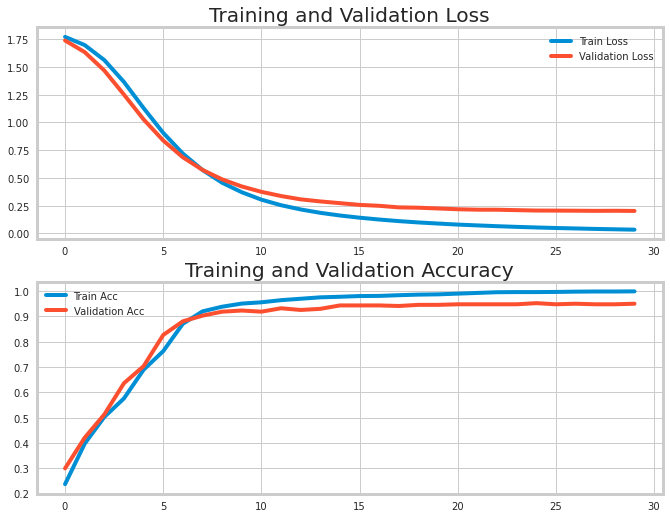

In [12]:
### Plot the performance of the model
rcParams['figure.figsize'] = [10,8]
plt.style.use('fivethirtyeight') 
sns.set_style('whitegrid')
grid = gridspec.GridSpec(2,1)

# Get the metrics and loss
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]
epo   = range(len(acc)) # Get number of epochs

# Plot the loss
ax = plt.subplot(grid[0])
ax.plot(epo, loss, label='Train Loss')
ax.plot(epo, val_loss, label='Validation Loss')
ax.set_title('Training and Validation Loss')
ax.legend() ;

# Plot the acccuracy
ax = plt.subplot(grid[1])
ax.plot(epo, acc, label='Train Acc')
ax.plot(epo, val_acc, label='Validation Acc')
ax.set_title('Training and Validation Accuracy')
ax.legend() ;

In [13]:
### Make dictionary to reverse the number from tokenizing to text
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


In [14]:
### Get the embedding weight for visualization
e = model.layers[0]
weights = e.get_weights()[0]

In [15]:
### Save the weight
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, VOCAB_SIZE):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

# Use the file to make embedding visualization at https://projector.tensorflow.org/

# Stanford

In [7]:
### Get data
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/training_cleaned.csv \
    -O /tmp/training_cleaned.csv

--2020-07-11 14:10:56--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/training_cleaned.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 172.217.203.128, 74.125.139.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 238942690 (228M) [application/octet-stream]
Saving to: ‘/tmp/training_cleaned.csv’

/tmp/training_clean 100%[===================>] 227.87M   122MB/s    in 1.9s    

2020-07-11 14:10:58 (122 MB/s) - ‘/tmp/training_cleaned.csv’ saved [238942690/238942690]



In [8]:
### Load the data
data = pd.read_csv('/tmp/training_cleaned.csv', names=['label','id','time','query','handle','text'])
data = data.sample(frac=1).reset_index(drop=True)
sentences = list(data['text'])
label = list(data['label'].map({0:0, 4:1}))

In [9]:
### Define variable for tokenizing and modelling
EMBEDDING_DIM = 100
MAX_LENGTH = 16
TRUNC_TYPE = 'post'
PADDING_TYPE = 'post'
OOV_TOK = '<OOV>'
TRAIN_PROP = .8

In [11]:
### Split dataset
train_size = int(TRAIN_PROP * len(sentences))
train_sentences = sentences[:train_size]
train_label = label[:train_size]
val_sentences = sentences[train_size:]
val_label = label[train_size:]

print(train_size)
print(len(train_sentences))
print(len(train_label))
print(len(val_sentences))
print(len(val_label))

1280000
1280000
1280000
320000
320000


In [12]:
### Tokenize the train sentences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
text_tokenizer = Tokenizer(oov_token=OOV_TOK)

# Get the token dict from data
text_tokenizer.fit_on_texts(train_sentences)
word_index = text_tokenizer.word_index

# Pad the data
train_sequences = text_tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding=PADDING_TYPE, truncating=TRUNC_TYPE, maxlen=MAX_LENGTH)

In [14]:
### Pad the validation data
val_sequences = text_tokenizer.texts_to_sequences(val_sentences)
val_padded = pad_sequences(val_sequences, padding=PADDING_TYPE, truncating=TRUNC_TYPE, maxlen=MAX_LENGTH)

In [15]:
### Define vocab size
VOCAB_SIZE = len(word_index) + 1

In [16]:
### Get weight for embedding matrix in model
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt \
    -O /tmp/glove.6B.100d.txt
    
# Load the weight
embeddings_index = {};
with open('/tmp/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

# Make weight matrix
embeddings_matrix = np.zeros((VOCAB_SIZE, EMBEDDING_DIM));
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

--2020-07-11 05:14:36--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.128, 108.177.125.128, 74.125.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 347116733 (331M) [text/plain]
Saving to: ‘/tmp/glove.6B.100d.txt’

/tmp/glove.6B.100d. 100%[===================>] 331.04M   197MB/s    in 1.7s    

2020-07-11 05:14:38 (197 MB/s) - ‘/tmp/glove.6B.100d.txt’ saved [347116733/347116733]



In [17]:
### Make model
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D, GlobalMaxPooling1D, Conv1D, LSTM, Bidirectional, GRU
from tensorflow.keras import Sequential, Model
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.metrics import Precision

# Make simple embedding model
model_simple = Sequential()
model_simple.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LENGTH,
                    weights=[embeddings_matrix], trainable=False))
model_simple.add(GlobalAveragePooling1D())
model_simple.add(Dense(128, activation='relu'))
model_simple.add(Dense(1, activation='sigmoid'))

model_simple.compile(optimizer = Adam(),
              loss = 'binary_crossentropy',
              metrics = 'accuracy')

# Make single LSTM model
model_single_lstm = Sequential()
model_single_lstm.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LENGTH,
                    weights=[embeddings_matrix], trainable=False))
model_single_lstm.add(Bidirectional(LSTM(64)))
model_single_lstm.add(Dense(128, activation='relu'))
model_single_lstm.add(Dense(1, activation='sigmoid'))

model_single_lstm.compile(optimizer = Adam(),
              loss = 'binary_crossentropy',
              metrics = 'accuracy')

# Make single GRU
model_single_gru = Sequential()
model_single_gru.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LENGTH,
                    weights=[embeddings_matrix], trainable=False))
model_single_gru.add(Bidirectional(GRU(64)))
model_single_gru.add(Dense(128, activation='relu'))
model_single_gru.add(Dense(1, activation='sigmoid'))

model_single_gru.compile(optimizer = Adam(),
              loss = 'binary_crossentropy',
              metrics = 'accuracy')

# Make single Conv
model_single_conv = Sequential()
model_single_conv.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LENGTH,
                    weights=[embeddings_matrix], trainable=False))
model_single_conv.add(Conv1D(64, 5, activation='relu'))
model_single_conv.add(GlobalMaxPooling1D())
model_single_conv.add(Dense(128, activation='relu'))
model_single_conv.add(Dense(1, activation='sigmoid'))

model_single_conv.compile(optimizer = Adam(),
              loss = 'binary_crossentropy',
              metrics = 'accuracy')

In [18]:
### Plot the performance of the model
def plot_history(history) :
    rcParams['figure.figsize'] = [10,8]
    plt.style.use('fivethirtyeight') 
    sns.set_style('whitegrid')
    grid = gridspec.GridSpec(2,1)

    # Get the metrics and loss
    acc      = history.history[     'accuracy' ]
    val_acc  = history.history[ 'val_accuracy' ]
    loss     = history.history[    'loss' ]
    val_loss = history.history['val_loss' ]
    epo   = range(len(acc)) # Get number of epochs

    # Plot the loss
    ax = plt.subplot(grid[0])
    ax.plot(epo, loss, label='Train Loss')
    ax.plot(epo, val_loss, label='Validation Loss')
    ax.set_title('Training and Validation Loss')
    ax.legend() ;

    # Plot the acccuracy
    ax = plt.subplot(grid[1])
    ax.plot(epo, acc, label='Train Acc')
    ax.plot(epo, val_acc, label='Validation Acc')
    ax.set_title('Training and Validation Accuracy')
    ax.legend() ;

In [ ]:
### Train simple model
num_epochs = 5
history_simple = model_simple.fit(train_padded,
                    np.array(train_label),
                    epochs=num_epochs,
                    validation_data=(val_padded, np.array(val_label)),
                    verbose=1)

%time

In [ ]:
### Plot simple model performance
plot_history(history_simple)

In [19]:
### Train single lstm model
num_epochs = 10
history_single_lstm = model_single_lstm.fit(train_padded,
                    np.array(train_label),
                    epochs=num_epochs,
                    validation_data=(val_padded, np.array(val_label)),
                    verbose=1)

%time

Epoch 1/10
40000/40000 [==============================] - 244s 6ms/step - loss: 0.4696 - accuracy: 0.7731 - val_loss: 0.4413 - val_accuracy: 0.7920
Epoch 2/10
40000/40000 [==============================] - 243s 6ms/step - loss: 0.4314 - accuracy: 0.7973 - val_loss: 0.4294 - val_accuracy: 0.7985
Epoch 3/10
40000/40000 [==============================] - 243s 6ms/step - loss: 0.4180 - accuracy: 0.8052 - val_loss: 0.4272 - val_accuracy: 0.8006
Epoch 4/10
40000/40000 [==============================] - 243s 6ms/step - loss: 0.4091 - accuracy: 0.8101 - val_loss: 0.4257 - val_accuracy: 0.8011
Epoch 5/10
40000/40000 [==============================] - 242s 6ms/step - loss: 0.4024 - accuracy: 0.8140 - val_loss: 0.4289 - val_accuracy: 0.7993
Epoch 6/10
40000/40000 [==============================] - 243s 6ms/step - loss: 0.3970 - accuracy: 0.8169 - val_loss: 0.4249 - val_accuracy: 0.8014
Epoch 7/10
40000/40000 [==============================] - 244s 6ms/step - loss: 0.3924 - accuracy: 0.8196 - val_

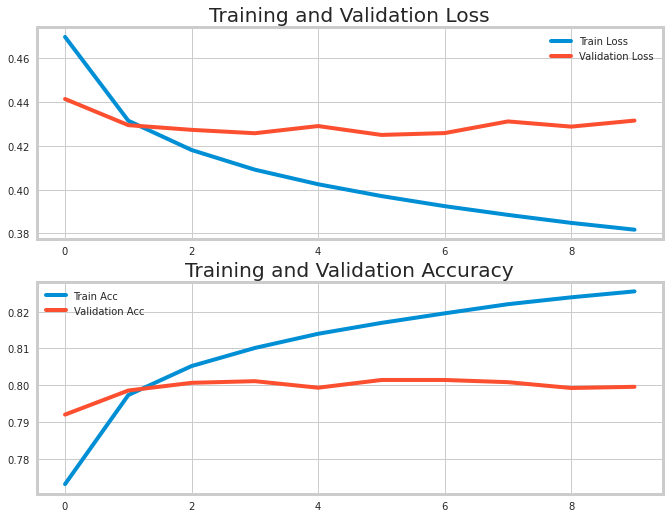

In [20]:
### Plot simple model performance
plot_history(history_single_lstm)

In [ ]:
### Train single gru model
num_epochs = 5
history_single_gru = model_single_gru.fit(train_padded,
                    np.array(train_label),
                    epochs=num_epochs,
                    validation_data=(val_padded, np.array(val_label)),
                    verbose=1)

%time

In [ ]:
### Plot simple model performance
plot_history(history_single_gru)

In [ ]:
### Train single conv model
num_epochs = 5
history_single_conv = model_single_conv.fit(train_padded,
                    np.array(train_label),
                    epochs=num_epochs,
                    validation_data=(val_padded, np.array(val_label)),
                    verbose=1)

%time

In [ ]:
### Plot simple model performance
plot_history(history_single_conv)

In [ ]:
### Make complicated model
from tensorflow.keras.layers import Dense, Embedding, Dropout, MaxPooling1D, GlobalAveragePooling1D, GlobalMaxPooling1D, Conv1D, LSTM, Bidirectional, GRU
from tensorflow.keras import Sequential, Model
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.metrics import Precision

# Make simple embedding model
model = Sequential()
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LENGTH,
                    weights=[embeddings_matrix], trainable=False))
model.add(Dropout(0.2))
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(4))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = Adam(),
              loss = 'binary_crossentropy',
              metrics = 'accuracy')

In [ ]:
### Train single conv model
num_epochs = 5
history = model.fit(train_padded,
                    np.array(train_label),
                    epochs=num_epochs,
                    validation_data=(val_padded, np.array(val_label)),
                    verbose=1)

%time

In [ ]:
### Plot simple model performance
plot_history(history)

# Shakespeare

In [2]:
### Get data
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt

--2020-07-11 17:54:28--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.214.128, 173.194.217.128, 172.217.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-07-11 17:54:28 (74.5 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [3]:
### Load the data
data = open('/tmp/sonnets.txt').read()
corpus = data.lower().split('\n')

In [4]:
### Define variable for tokenizing and modelling
EMBEDDING_DIM = 100
TRUNC_TYPE = 'post'
PADDING_TYPE = 'pre'
OOV_TOK = '<OOV>'
TRAIN_PROP = .8

In [9]:
### Make the input sequences for prediciton word
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer()

# Tokenize the corpus
tokenizer.fit_on_texts(corpus)
word_index = tokenizer.word_index
VOCAB_SIZE = len(word_index) + 1

# Make input sequences
train_seq = []
for text in corpus :
    token_list = tokenizer.texts_to_sequences([text])[0]
    
    for i in range(1, len(token_list)) :
        gram = token_list[:i+1]
        train_seq.append(gram)
        
# Pad the sequences
MAX_LENGTH = np.max([len(seq) for seq in train_seq])
train_padded = pad_sequences(train_seq, padding=PADDING_TYPE, maxlen=MAX_LENGTH)

# Split to train data and label
train_data, train_label = train_padded[:,:-1], train_padded[:,-1]

# One hot label
from tensorflow.keras.utils import to_categorical
train_label = to_categorical(train_label, num_classes=VOCAB_SIZE)

In [10]:
### Get weight for embedding matrix in model
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt \
    -O /tmp/glove.6B.100d.txt
    
# Load the weight
embeddings_index = {};
with open('/tmp/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

# Make weight matrix
embeddings_matrix = np.zeros((VOCAB_SIZE, EMBEDDING_DIM));
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

--2020-07-11 17:57:10--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 172.217.203.128, 74.125.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 347116733 (331M) [text/plain]
Saving to: ‘/tmp/glove.6B.100d.txt’

/tmp/glove.6B.100d. 100%[===================>] 331.04M   172MB/s    in 1.9s    

2020-07-11 17:57:12 (172 MB/s) - ‘/tmp/glove.6B.100d.txt’ saved [347116733/347116733]



In [28]:
### Make model
from tensorflow.keras.layers import Dense, Embedding, TimeDistributed, Dropout, GlobalAveragePooling1D, GlobalMaxPooling1D, Conv1D, LSTM, Bidirectional, GRU
from tensorflow.keras import Sequential, Model
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.metrics import Precision

# Make simple embedding model
model = Sequential()
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LENGTH-1,
                    weights=[embeddings_matrix], trainable=True))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(VOCAB_SIZE // 2, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(VOCAB_SIZE, activation='softmax'))

model.compile(optimizer = Adam(),
              loss = 'categorical_crossentropy',
              metrics = 'accuracy')

In [29]:
### Train model
num_epochs = 100
history = model.fit(train_data,
                    train_label,
                    epochs=num_epochs,
                    verbose=1)

%time

Epoch 1/100
417/484 [========================>.....] - ETA: 0s - loss: 7.0494 - accuracy: 0.0213

KeyboardInterrupt: 

In [19]:
### Plot the performance of the model
def plot_history(history) :
    rcParams['figure.figsize'] = [10,8]
    plt.style.use('fivethirtyeight') 
    sns.set_style('whitegrid')
    grid = gridspec.GridSpec(2,1)

    # Get the metrics and loss
    acc      = history.history[     'accuracy' ]
    loss     = history.history[    'loss' ]
    epo   = range(len(acc)) # Get number of epochs

    # Plot the loss
    ax = plt.subplot(grid[0])
    ax.plot(epo, loss, label='Train Loss')
    ax.set_title('Training Loss')
    ax.legend() ;

    # Plot the acccuracy
    ax = plt.subplot(grid[1])
    ax.plot(epo, acc, label='Train Acc')
    ax.set_title('Training Accuracy')
    ax.legend() ;

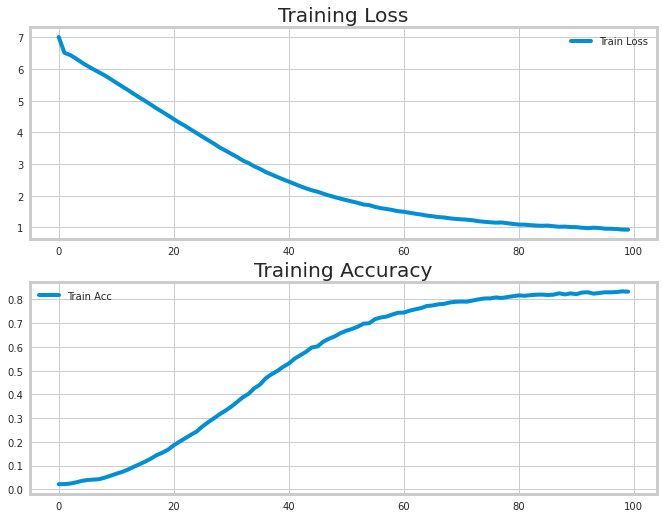

In [20]:
### Plot model performance - LSTM no Bidirection
plot_history(history)

In [21]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=MAX_LENGTH-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope to thee at thee was not till your strong eyes quite stout sounds delight than dust can gracious survey than an father alchemy loved still rare lies tend seem seem green she shows thee when thee brought to thrust pace worn thus spent false prove bright stay thee herself and be partly lies doth latch tell some prove some wrong more near hence flowers do seek to change but by true head have told i thinly placed are false and sweetness open book dead enemies shall sit another gay spent false art fire alone thinks no ill great lies now
